In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv(r'C:\Users\User\Desktop\WORK\my_datas\13_03_23_materials.csv')

In [234]:
df.head(3)

,product_id,value
0,4590,"70% шерсть, 30% полиэстер"
1,768,"77% полиамид, 23% эластан"
2,769,"77% полиамид, 15% эластан, 8% хлопок"


### Materials to dict

In [109]:
materials = {}

In [110]:
words_to_change = ['Подкладка:', 'Верх:']

for i, value in enumerate(df.values):
    for word  in words_to_change:
        value[1] = value[1].replace(word, '')
        
    if value[1] == 'Не задано':
        continue
    mats = []
    for mat in value[1].split(','):
        if '%' in mat:
            mats.append([mat.split('%')[1].strip(), mat.split('%')[0]])
        else:
            mats.append([mat, 'unk'])
    materials[value[0]] = mats

In [118]:
materials_sep_cols = {}

In [141]:
words_to_change = ['Подкладка:', 'Верх:']

for i, value in enumerate(df.values):
    for word  in words_to_change:
        value[1] = value[1].replace(word, '')
        
    if value[1] == 'Не задано':
        continue
    mats = []
    for mat in value[1].split(','):
        if '%' in mat:
            mats.extend([mat.split('%')[1].strip(), mat.split('%')[0]])
        elif ';' in mat:
            mats.extend([mat.split(';')[1].strip(), mat.split(';')[0]])
        else:
            mats.extend([mat, 'unk'])
    materials_sep_cols[value[0]] = mats

In [243]:
list(materials_sep_cols.items())[:5]

[(4590, ['шерсть', '70', 'полиэстер', ' 30']),
 (768, ['полиамид', '77', 'эластан', ' 23']),
 (769, ['полиамид', '77', 'эластан', ' 15', 'хлопок', ' 8']),
 (831, ['хлопок', '97', 'эластан', ' 3']),
 (4765, ['шерсть', '50', 'акрил', ' 50'])]

### Outs

In [134]:
df_tatal = pd.DataFrame.from_dict(materials_sep_cols, orient='index')

In [239]:
df_tatal.head(3)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
4590,шерсть,70,полиэстер,30,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
768,полиамид,77,эластан,23,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
769,полиамид,77,эластан,15,хлопок,8,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [137]:
df_tatal.to_excel('Первая_по_материалам.xlsx')

### Top materials

In [215]:
mat_amount = {}

In [216]:
for value in materials_sep_cols.values():
    for elem in value:
        if elem.strip().isalpha():
            if elem.strip().title() in mat_amount:
                mat_amount[elem.strip().title()] += 1
            else:
                mat_amount[elem.strip().title()] = 1

In [217]:
del mat_amount['Unk']

In [218]:
top_materials = pd.DataFrame.from_dict(mat_amount, orient='index', columns=['amount'])

In [219]:
top_materials = top_materials.reset_index(drop=False, inplace=False)\
    .rename(columns={'index': 'material'})\
    .sort_values(by='amount', ascending=False)

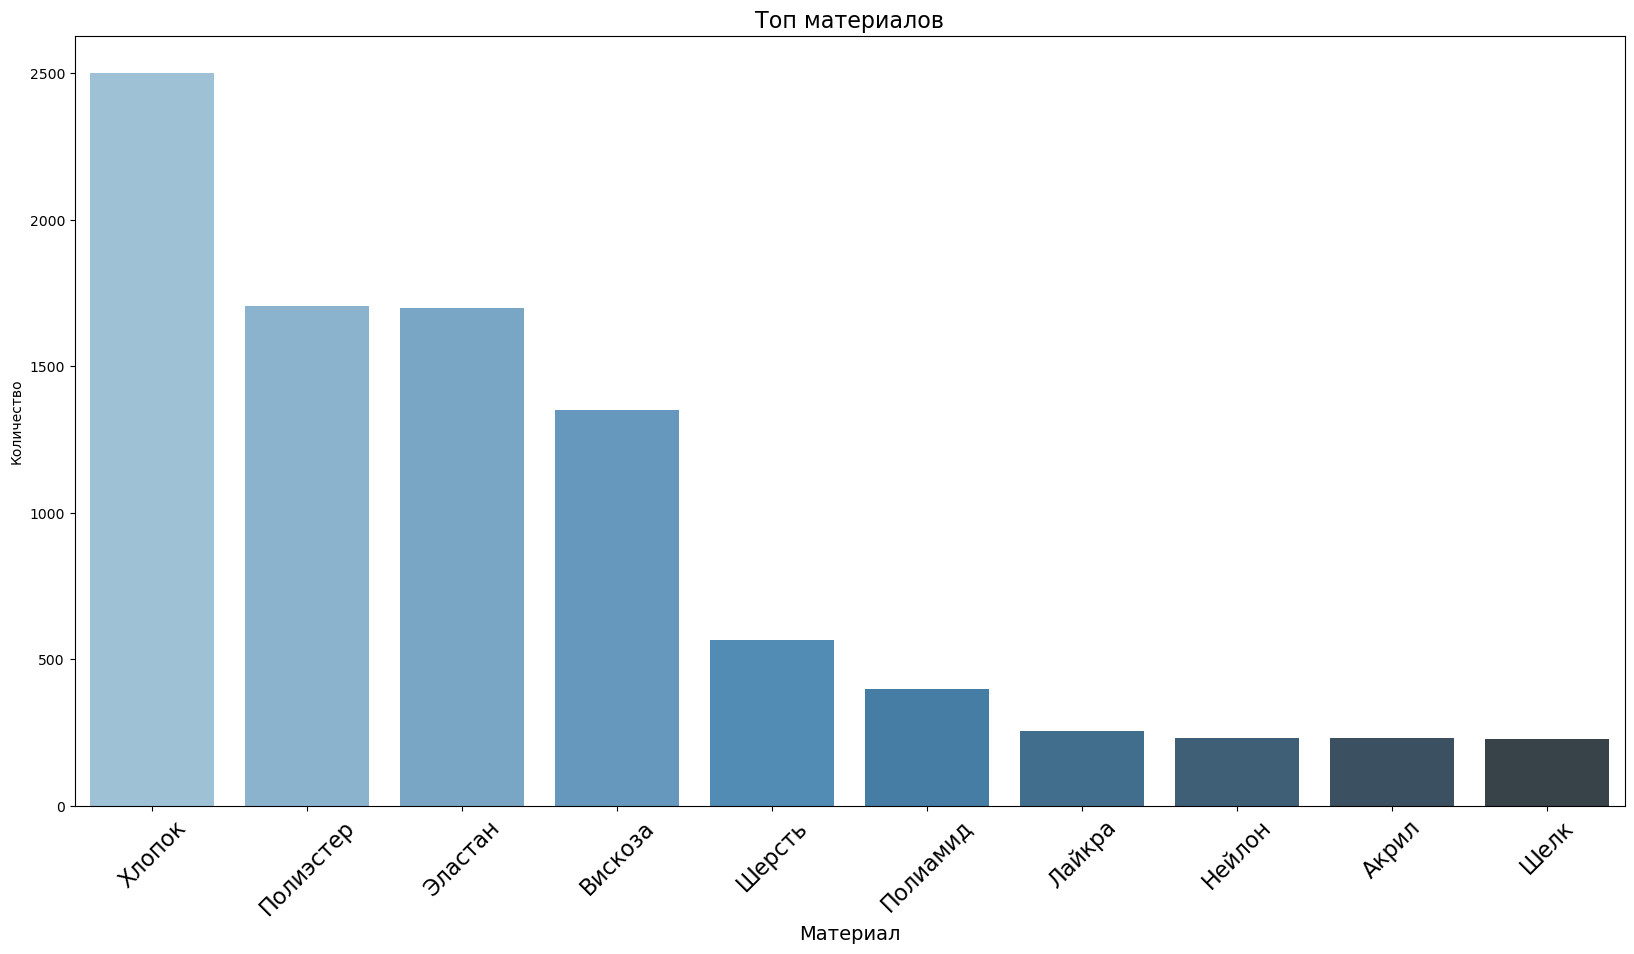

In [233]:
plt.figure(figsize=(20, 10))
sns.barplot(x='material', y='amount', data=top_materials[:10], palette='Blues_d')
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=16)
plt.title('Топ материалов', fontsize=16)
plt.xlabel('Материал', fontsize=14)
plt.ylabel('Количество')
plt.savefig('top_materials_13_03.jpeg')
plt.show()

In [232]:
plt.savefig('top_materials_13_03.jpeg')

<Figure size 640x480 with 0 Axes>